In [ ]:
Putting it All Together: UCI Breast Cancer Data Set

In [ ]:
'''The dataset is provided thanks to:

Street, N.  (1990). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data]. Madison, WI: University of Wisconsin, Computer Sciences Dept.
'''

In [3]:
import numpy as np
import pandas as pd
data_web_address = data_web_address = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['radius',
                'texture',
                'perimeter',
                'area',
                'smoothness' 
                ,'compactness',
                'concavity',
                'concave points', 
                'symmetry',
                'malignant']

feature_names = column_names[:-1]
all_data = pd.read_csv(data_web_address , names=column_names)
all_data.dtypes

radius             int64
texture            int64
perimeter          int64
area               int64
smoothness         int64
compactness       object
concavity          int64
concave points     int64
symmetry           int64
malignant          int64
dtype: object

In [4]:
#changing the state of having cancer to 1, not having cancer to 0
all_data['malignant'] = all_data['malignant'].astype(np.int)
all_data['malignant'] = np.where(all_data['malignant'] == 4, 1,0) #4, and now 1 means malignant
all_data['malignant'].value_counts()

0    458
1    241
Name: malignant, dtype: int64

In [5]:
X = all_data[[col for col in feature_names if col != 'compactness']]
y = all_data.malignant

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_proba = lr.predict_proba(X_test)

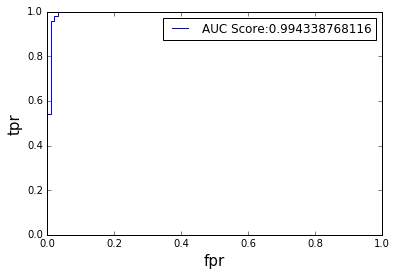

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])

auc_score = auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')